# Home Credit 

## Data Set

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
application_train = pd.read_csv('/Users/mengbai/Desktop/Home Credit/application_train.csv')
application_test= pd.read_csv('/Users/mengbai/Desktop/Home Credit/application_test.csv')
bureau = pd.read_csv('/Users/mengbai/Desktop/Home Credit/bureau.csv')
bureau_balance = pd.read_csv('/Users/mengbai/Desktop/Home Credit/bureau_balance.csv')
POS_CASH_balance = pd.read_csv('/Users/mengbai/Desktop/Home Credit/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('/Users/mengbai/Desktop/Home Credit/credit_card_balance.csv')
previous_application = pd.read_csv('/Users/mengbai/Desktop/Home Credit/previous_application.csv')
installments_payments = pd.read_csv('/Users/mengbai/Desktop/Home Credit/installments_payments.csv')

In [8]:
# application_train.head(5)
print('------------main------------')
print('application_train:', application_train.shape[0], "rows and", application_train.shape[1],'columns')
print('application_test:', application_test.shape[0], "rows and", application_test.shape[1],'columns')
print('      ')
print('------------others------------')
print('POS_CASH_balance:', POS_CASH_balance.shape[0], "rows and", POS_CASH_balance.shape[1],'columns')
print('bureau:', bureau.shape[0], "rows and", bureau.shape[1],'columns')
print('bureau_balance:', bureau_balance.shape[0], "rows and", bureau_balance.shape[1],'columns')
print('previous_application:', previous_application.shape[0], "rows and", previous_application.shape[1],'columns')
print('installments_payments:', installments_payments.shape[0], "rows and", installments_payments.shape[1],'columns')
print('credit_card_balance:', credit_card_balance.shape[0], "rows and", credit_card_balance.shape[1],'columns')

------------main------------
application_train: 307511 rows and 122 columns
application_test: 48744 rows and 121 columns
      
------------others------------
POS_CASH_balance: 10001358 rows and 8 columns
bureau: 1716428 rows and 17 columns
bureau_balance: 27299925 rows and 3 columns
previous_application: 1670214 rows and 37 columns
installments_payments: 13605401 rows and 8 columns
credit_card_balance: 3840312 rows and 23 columns


In [9]:
# 37 - 73 columns
train_3773 = application_train[['REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY',
'ORGANIZATION_TYPE',
'EXT_SOURCE_1',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE']]
train_3773.head(5)

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE
0,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,...,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0
1,0,0,0,0,0,0,School,0.311267,0.622246,NaN,...,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0
2,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 36 Numeric Variables
train_num = train_3773.select_dtypes(include=['number'])
print(train_num.columns.values)
len(train_num.columns.values)

['REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOORSMAX_AVG' 'FLOORSMIN_AVG'
 'LANDAREA_AVG' 'LIVINGAPARTMENTS_AVG' 'LIVINGAREA_AVG'
 'NONLIVINGAPARTMENTS_AVG' 'NONLIVINGAREA_AVG' 'APARTMENTS_MODE'
 'BASEMENTAREA_MODE' 'YEARS_BEGINEXPLUATATION_MODE' 'YEARS_BUILD_MODE'
 'COMMONAREA_MODE' 'ELEVATORS_MODE' 'ENTRANCES_MODE' 'FLOORSMAX_MODE'
 'FLOORSMIN_MODE' 'LANDAREA_MODE' 'LIVINGAPARTMENTS_MODE' 'LIVINGAREA_MODE'
 'NONLIVINGAPARTMENTS_MODE']


36

In [11]:
#  String
train_str = train_3773.select_dtypes(include=['object'])

In [12]:
print(train_str.columns.values)

['ORGANIZATION_TYPE']


## 1. Variable 37 - 42 Address Verification

#37 Flag if client's permanent address does not match contact address 
#38 Flag if client's permanent address does not match work address 
#39 Flag if client's contact address does not match work address 
#40 Flag if client's permanent address does not match contact address 
#41 Flag if client's permanent address does not match work address 
#42 Flag if client's contact address does not match work address
__________________________________________________________
Summary: 
18% Live and work in different cities;
8% Live and work in different regions

In [13]:
addr6 = train_3773.iloc[:,0:6]
addr6.describe()

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
pandas_profiling.ProfileReport(addr6)

Number of variables,6
Number of observations,307511
Total Missing (%),0.0%
Total size in memory,14.1 MiB
Average record size in memory,48.0 B
Numeric,0
Categorical,0
Boolean,6
Date,0
Text (Unique),0
Rejected,0


In [14]:
# Percentage
for x in range(0,6):
    print(addr6.iloc[:,x].value_counts(normalize=True))
    #print(addr6.iloc[:,x].value_counts())

0    0.984856
1    0.015144
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
0    0.949231
1    0.050769
Name: REG_REGION_NOT_WORK_REGION, dtype: float64
0    0.959341
1    0.040659
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64
0    0.921827
1    0.078173
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64
0    0.769546
1    0.230454
Name: REG_CITY_NOT_WORK_CITY, dtype: float64
0    0.820445
1    0.179555
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


In [15]:
# Frequency
for x in range(0,6):
    print(addr6.iloc[:,x].value_counts())

0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64
0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64
0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64
0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64
0    236644
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64
0    252296
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64


Check for missing Values

In [16]:
# No Missing Values
addr6.isnull().sum()

REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
dtype: int64

## 2. Variable 43 Organization Type 

Type of organization where client works

In [17]:
print(train_3773.iloc[:,6].value_counts(normalize=True))
print(train_3773.iloc[:,6].value_counts().sort_values(inplace=True))

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [74]:
pandas_profiling.ProfileReport(application_train.loc[:,['ORGANIZATION_TYPE','TARGET']])

Number of variables,2
Number of observations,307511
Total Missing (%),0.0%
Total size in memory,4.7 MiB
Average record size in memory,16.0 B
Numeric,0
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [18]:
train_3773.iloc[:,6].isnull().sum()

0

## 3. Variable 44 - 46 Normalized Score from External Source

In [19]:
ext_score = train_3773.iloc[:,7:10]
ext_score.isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [20]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
pd.set_option('display.float_format', lambda x:'%f'%x)
ext_score.describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.000000,306851.000000,246546.000000
mean,0.502130,0.514393,0.510853
std,0.211062,0.191060,0.194844
min,0.014568,0.000000,0.000527
25%,0.334007,0.392457,0.370650
50%,0.505998,0.565961,0.535276
75%,0.675053,0.663617,0.669057
max,0.962693,0.855000,0.896010


In [75]:
pandas_profiling.ProfileReport(ext_score)

Number of variables,3
Number of observations,307511
Total Missing (%),25.5%
Total size in memory,7.0 MiB
Average record size in memory,24.0 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [21]:
def find_missing(data):
    # number of missing values
    count_missing = data.isnull().sum().values
    # total records
    total = data.shape[0]
    # percentage of missing
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values)
find_missing(ext_score)

,missing_count,missing_ratio
EXT_SOURCE_1,173378,0.563811
EXT_SOURCE_2,660,0.002146
EXT_SOURCE_3,60965,0.198253


/Users/mengbai/.matplotlib


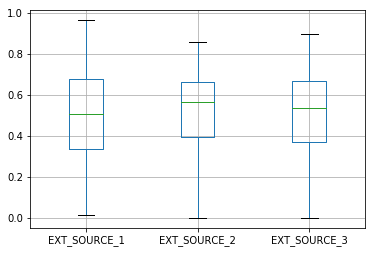

In [22]:
ext_score.boxplot(return_type='axes')
import matplotlib as mpl
print(mpl.get_cachedir())

## 4. Variable 47 - 73 Building Information where the client lives

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) 

apartment size, 
common area, 
living area, 
age of building, 
number of elevators, 
number of entrances, 
state of the building, 
number of floor

In [26]:
building = train_3773.iloc[:,10:]

In [27]:
building.head(3)

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE
0,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,...,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000
1,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,...,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [28]:
find_missing(building)

,missing_count,missing_ratio
APARTMENTS_AVG,156061,0.507497
BASEMENTAREA_AVG,179943,0.585160
YEARS_BEGINEXPLUATATION_AVG,150007,0.487810
YEARS_BUILD_AVG,204488,0.664978
COMMONAREA_AVG,214865,0.698723
ELEVATORS_AVG,163891,0.532960
ENTRANCES_AVG,154828,0.503488
FLOORSMAX_AVG,153020,0.497608
FLOORSMIN_AVG,208642,0.678486
LANDAREA_AVG,182590,0.593767


In [2]:
import pandas_profiling

In [29]:
pandas_profiling.ProfileReport(building)

Number of variables,27
Number of observations,307511
Total Missing (%),25.9%
Total size in memory,63.3 MiB
Average record size in memory,216.0 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,15


In [49]:
import missingno as mn
import random

rows = np.random.choice(building.index.values, 200)
df = building.loc[rows]


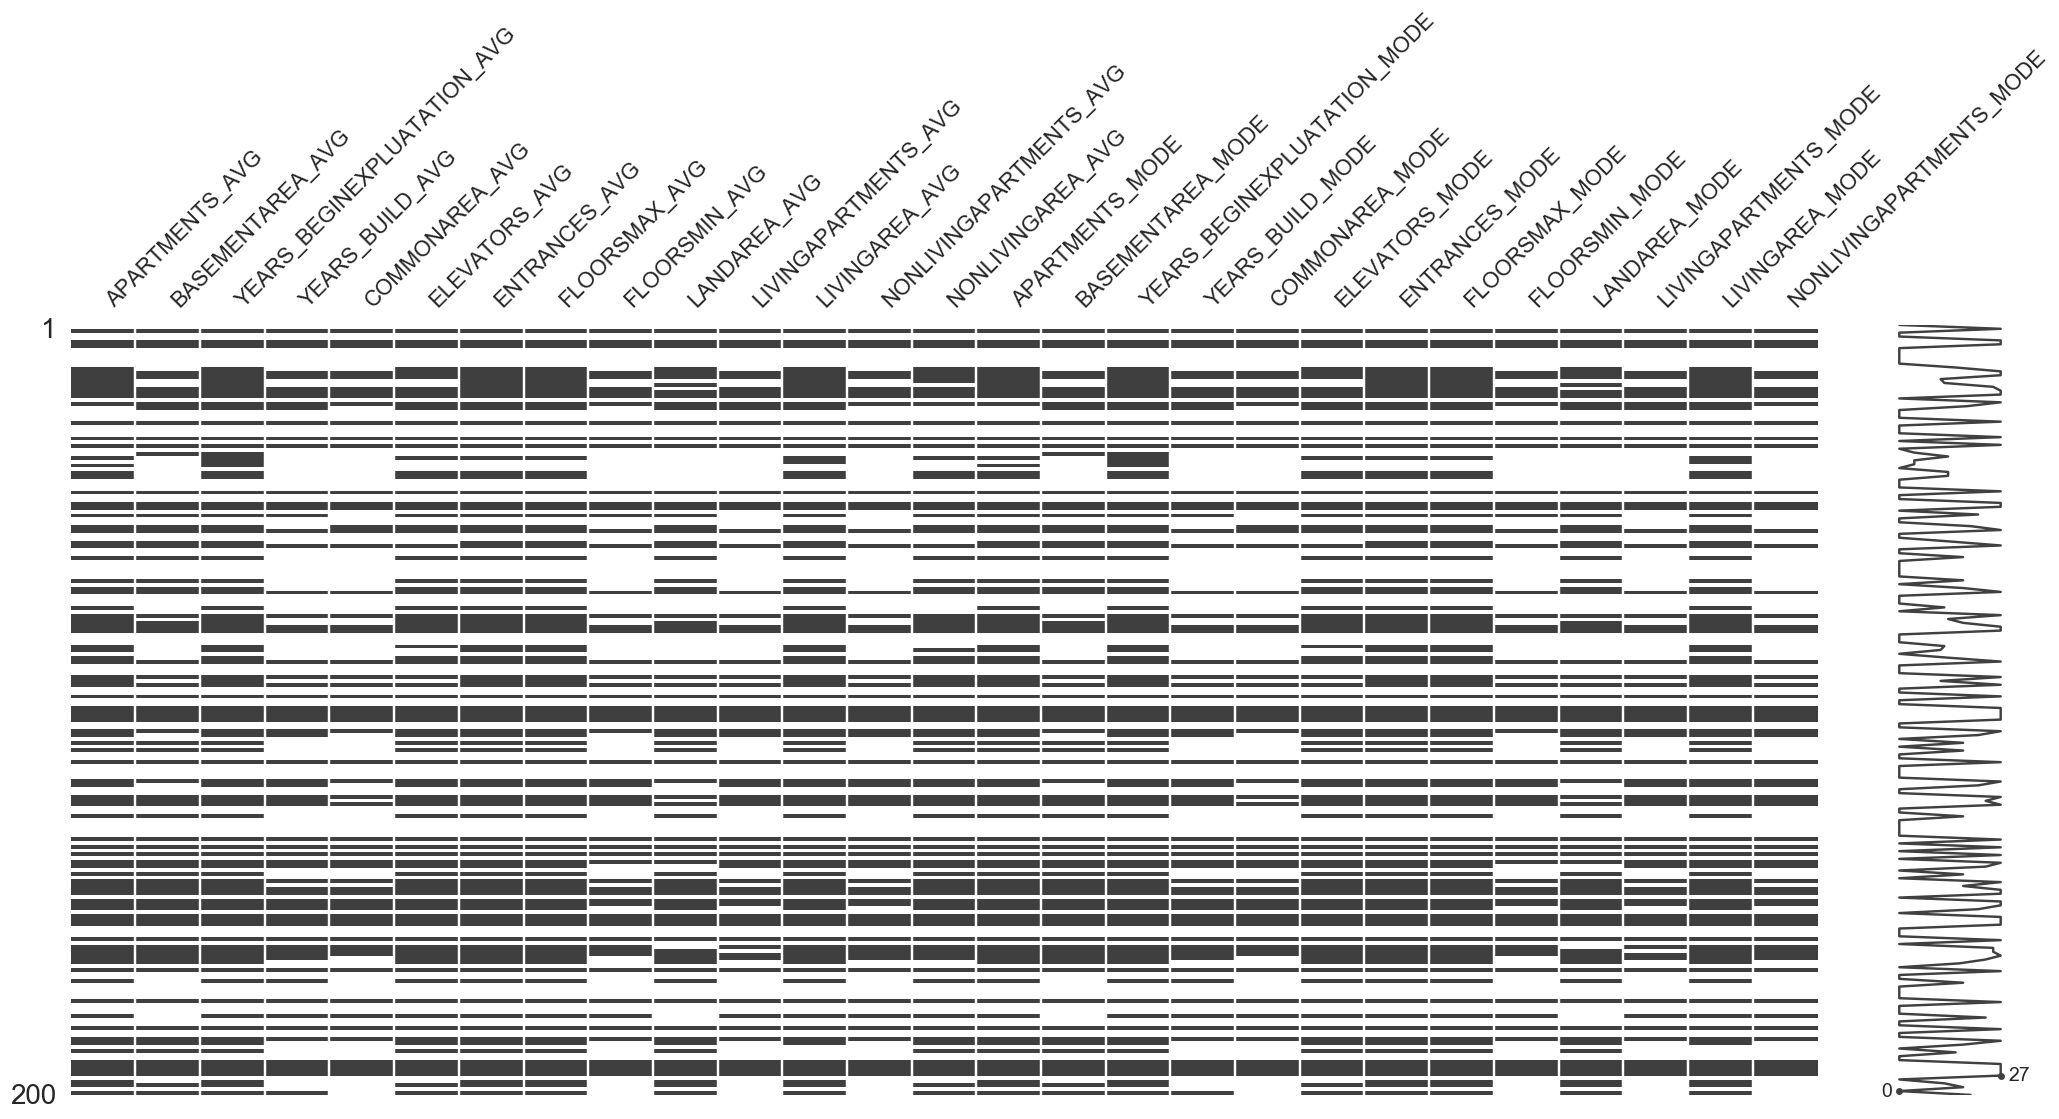

In [50]:
mn.matrix(df)

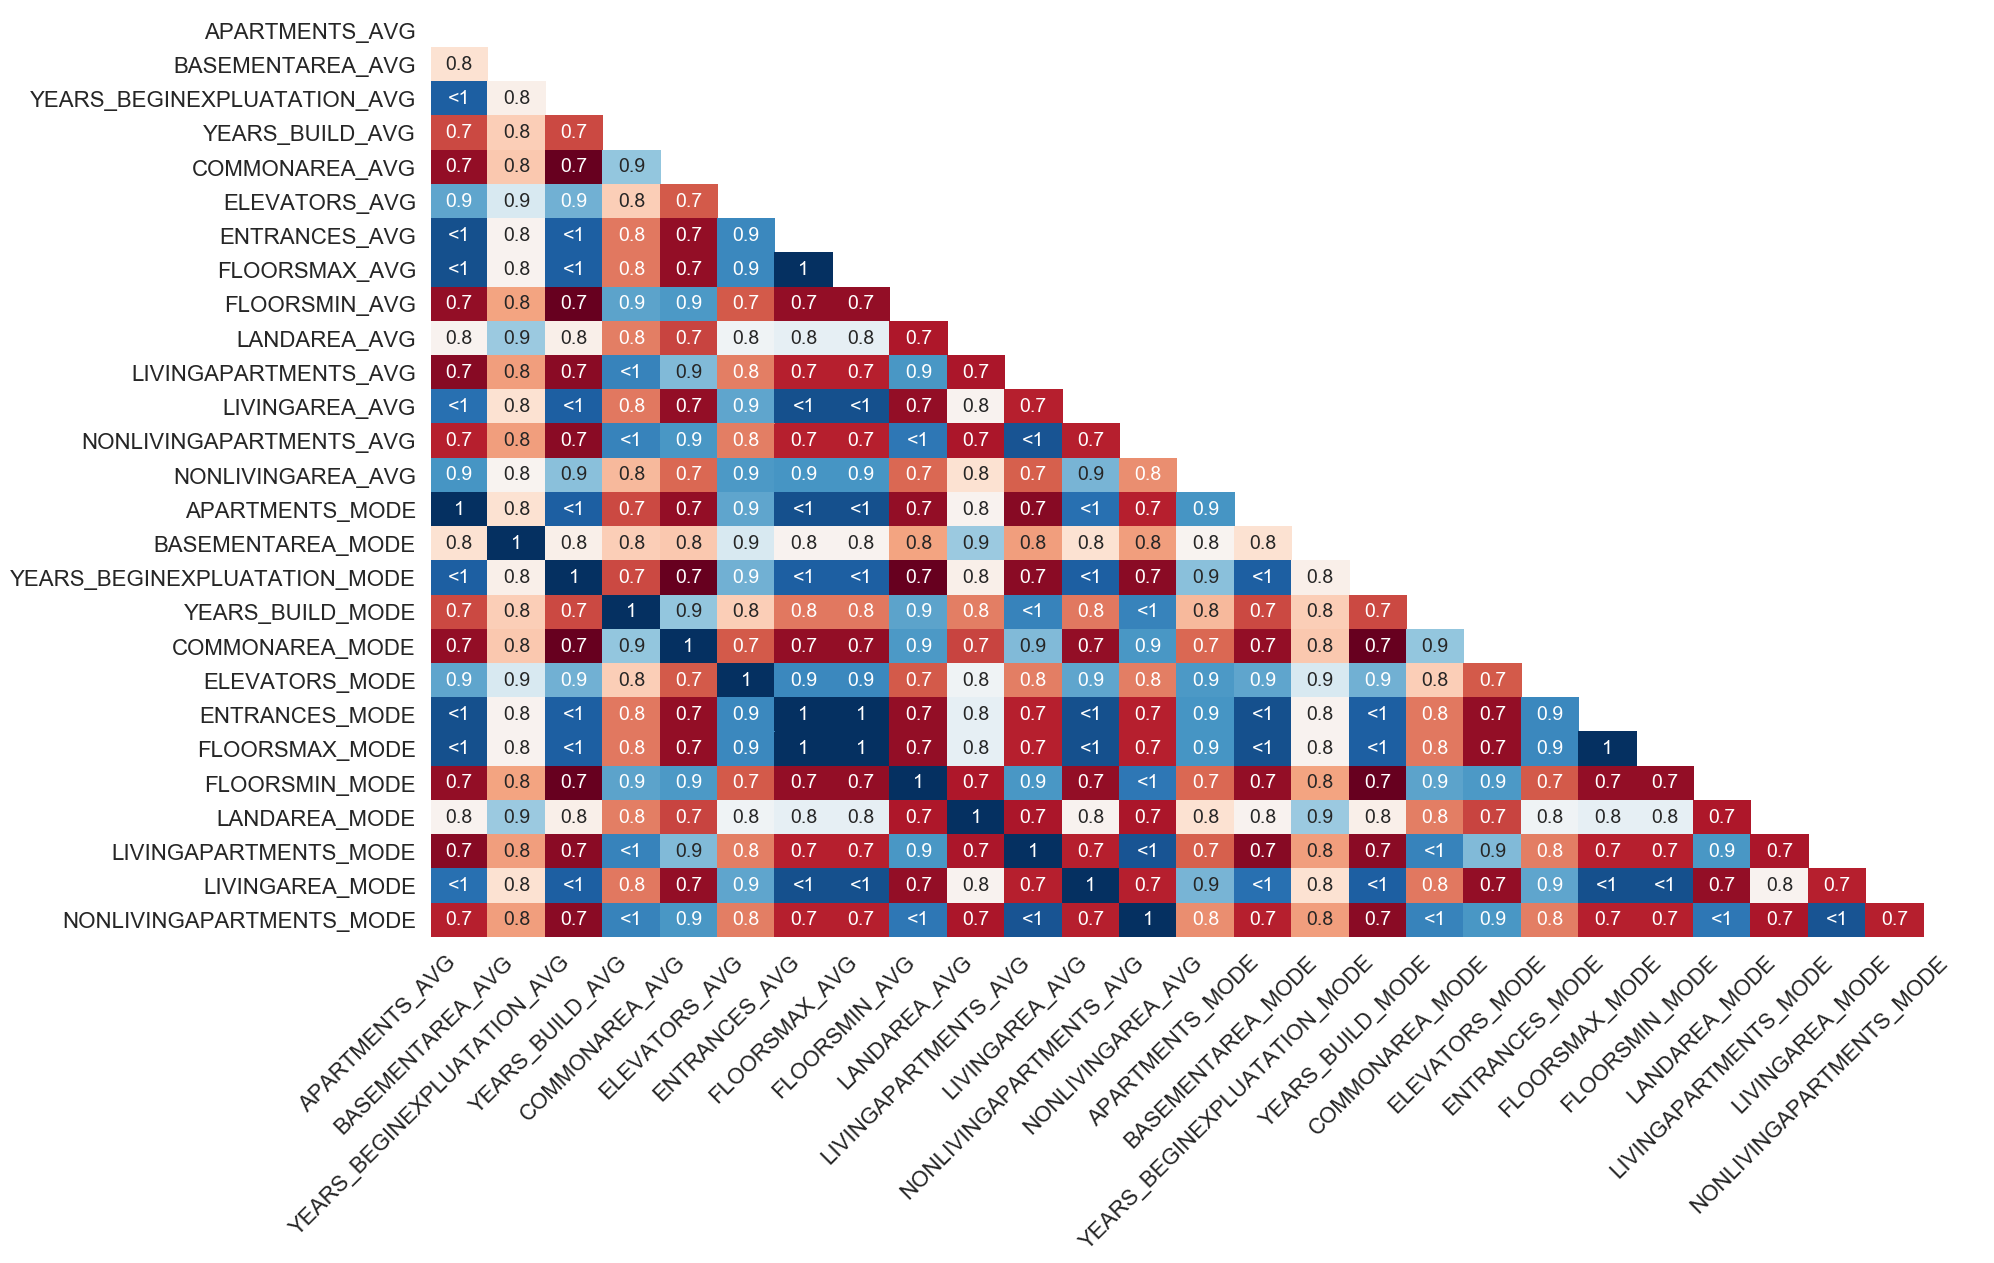

In [51]:
mn.heatmap(df)

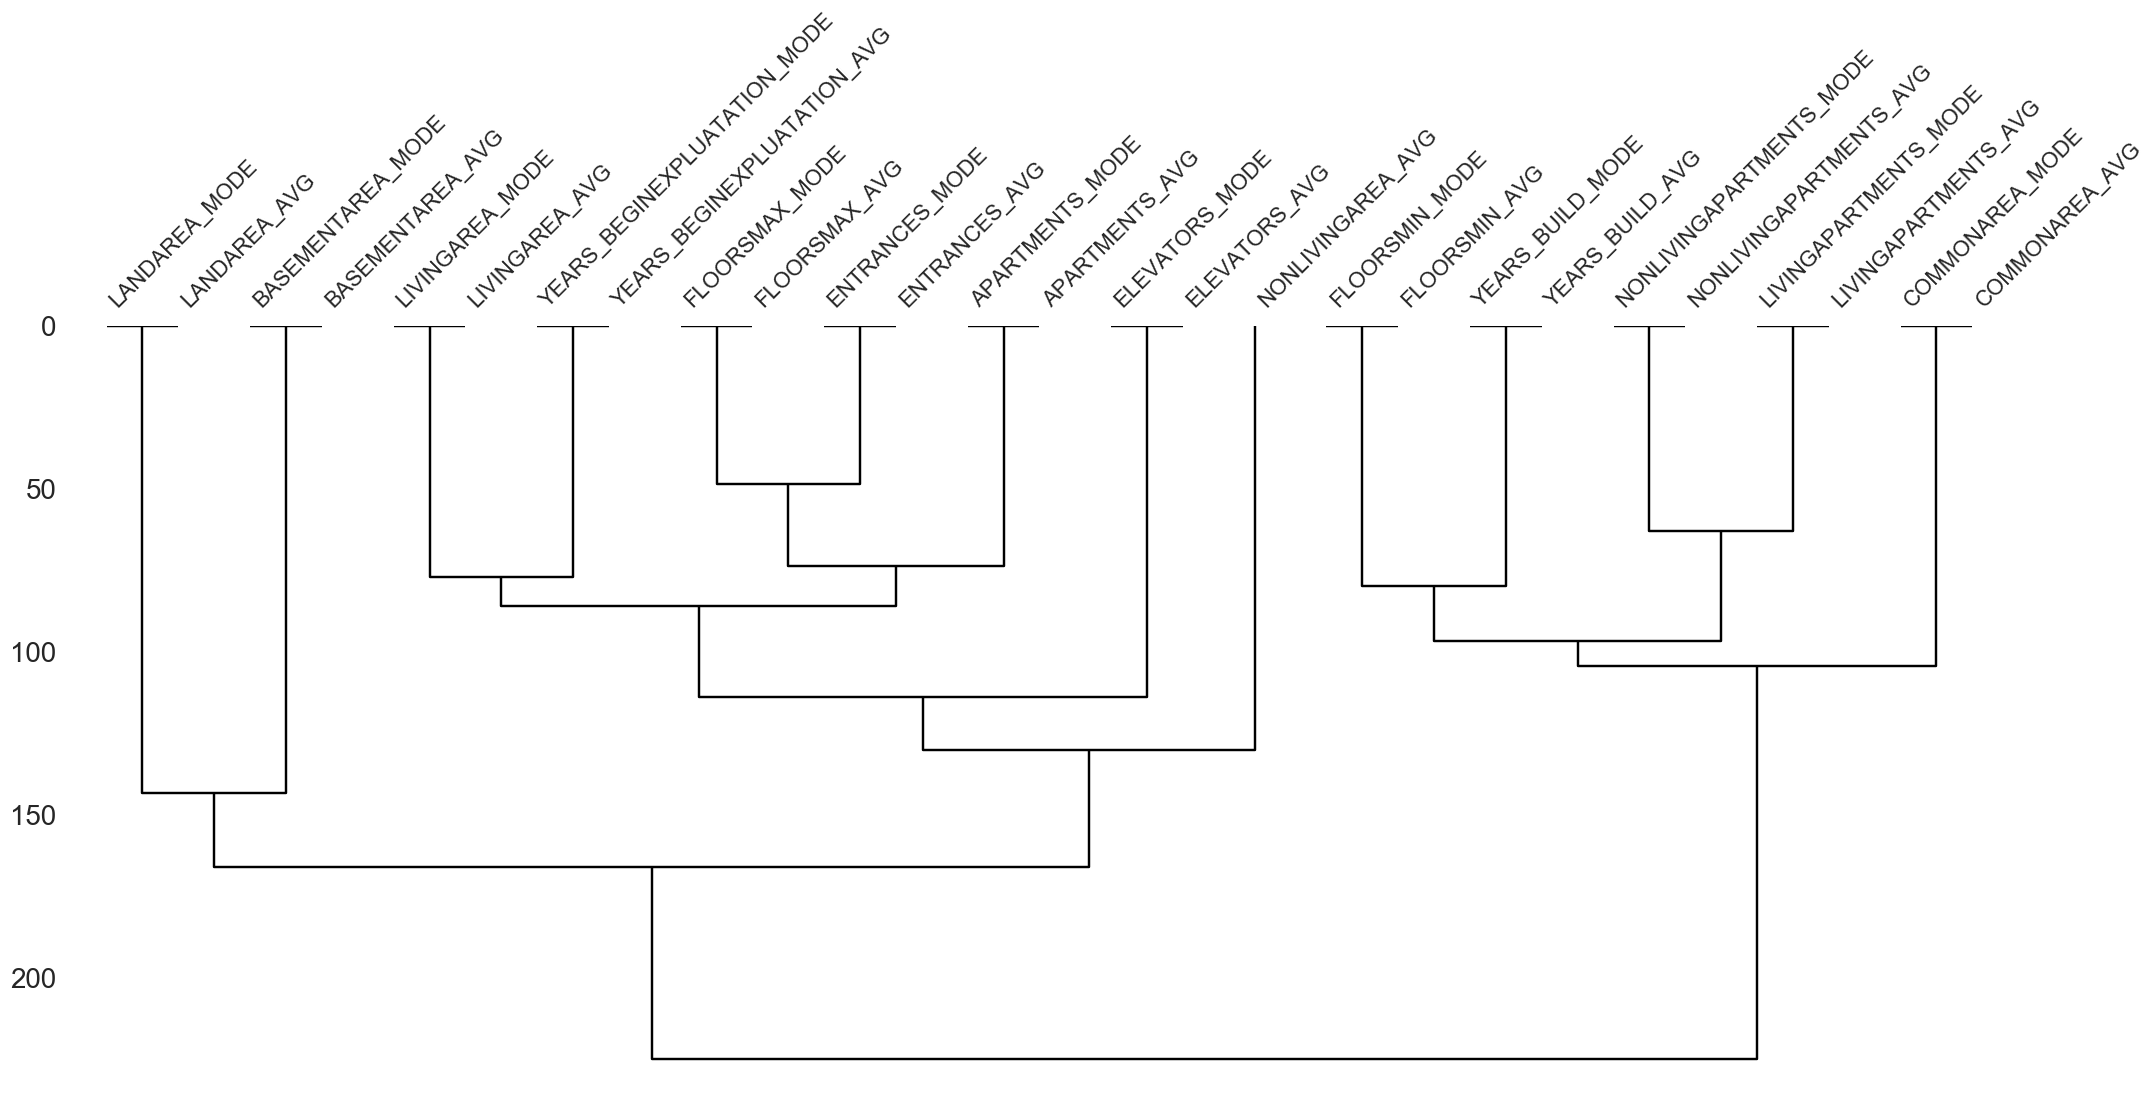

In [53]:
mn.dendrogram(building)

In [68]:
#train = application_train
train = application_train.loc[:,['TARGET','APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'TOTALAREA_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE']]

train['incomplete'] = 1
train.loc[train.isnull().sum(axis=1) <23,'incomplete'] = 0

mean_c = np.mean(train.loc[train['incomplete'] == 0, 'TARGET'].values)
mean_i = np.mean(train.loc[train['incomplete'] == 1, 'TARGET'].values)
print('default ratio for more complete: {:.2} \ndefault ratio for less complete: {:.2}'.format(mean_c, mean_i))

default ratio for more complete: 0.069 
default ratio for less complete: 0.091
